In [3]:
# load necessary libraries

import warnings
warnings.simplefilter("ignore")

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

filename = 'international-airline-passengers.csv'

In [4]:
# ---------------------------------
# set plot attributes
# ---------------------------------
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10, 7

In [5]:
# ---------------------------------
# Load Dataset
# ---------------------------------
dataset = pd.read_csv(filename, 
                      header=0, parse_dates=[0],
                      index_col=0, squeeze=True)
# print dataset
print()
print(dataset.shape)
print(dataset.head(25))


(144,)
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
Name: Passenger, dtype: int64


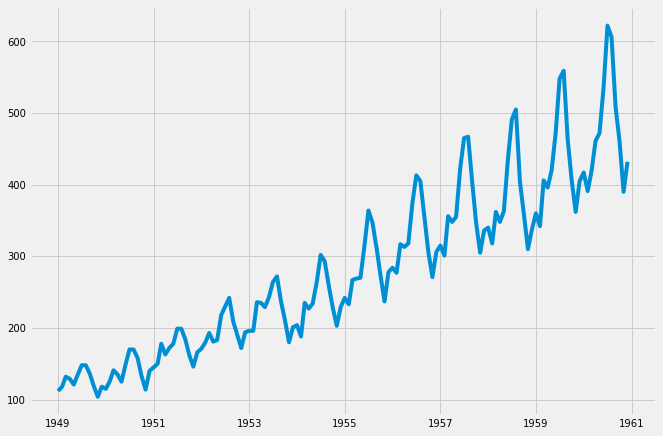

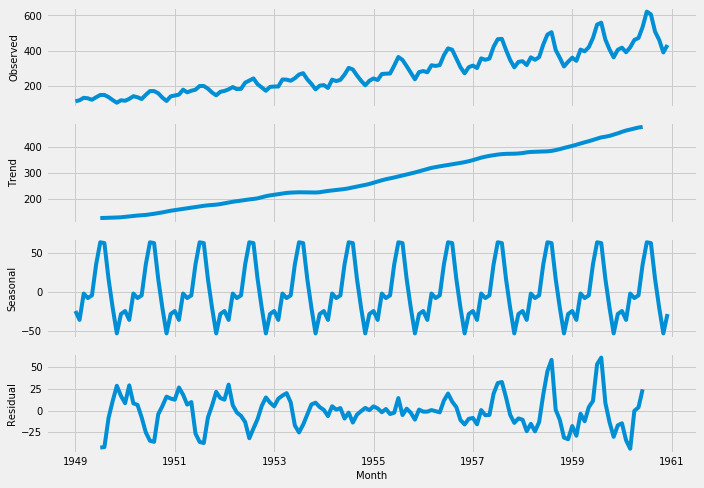

In [7]:
# ---------------------------------
# Visualise Time Series Dataset
# ---------------------------------
# Plot Dataset
plt.plot(dataset)
plt.show()

print('\n\n\n')

# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
decomposition.plot()
plt.show()

In [9]:
# -------------------------------------------------
# Grid Search for parameters - ARMA(p,q) Model 
# -------------------------------------------------
warnings.simplefilter("ignore")

p = q = range(0, 4)
pq = list(itertools.product(p, q)) # it replaces loop for iteration
print(pq)

params = []
AICs = []

print()
for param in pq:
        try:
                mod = ARMA(dataset, order=param)
                results = mod.fit()
                
                print()
                print("Parameter values for p and q {}".format(param))
                print('ARMA{} - AIC:{}'.format(param, results.aic))
                print()
            
                params.append(param)
                AICs.append(results.aic)
        except:
                continue

# Get the index of minimum AIC from the list
index_min_aic = np.argmin(AICs)

# Best parameter sets (p, q) for ARMA
print(params[index_min_aic])
print(AICs[index_min_aic])

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


Parameter values for p and q (0, 0)
ARMA(0, 0) - AIC:1790.3675804181141


Parameter values for p and q (0, 1)
ARMA(0, 1) - AIC:1618.8625269862678


Parameter values for p and q (1, 0)
ARMA(1, 0) - AIC:1428.1793794161047


Parameter values for p and q (1, 1)
ARMA(1, 1) - AIC:1409.7482700811797


Parameter values for p and q (1, 2)
ARMA(1, 2) - AIC:1411.0502544400345


Parameter values for p and q (1, 3)
ARMA(1, 3) - AIC:1419.9738807868878


Parameter values for p and q (2, 0)
ARMA(2, 0) - AIC:1413.6387839358695


Parameter values for p and q (2, 1)
ARMA(2, 1) - AIC:1408.2492233832327


Parameter values for p and q (3, 0)
ARMA(3, 0) - AIC:1410.342306108336


Parameter values for p and q (3, 1)
ARMA(3, 1) - AIC:1395.2744278248206


Parameter values for p and q (3, 2)
ARMA(3, 2) - AIC:1379.0637484788754


Parameter values for p and q (3, 3)
ARMA(3, 3) - AIC:137

In [10]:
# -------------------------------------------------
# Fit ARMA(p,q) Model with the best parameter sets
# -------------------------------------------------
model = ARMA(dataset, order = params[index_min_aic])
results = model.fit()

# Get summary of the model
print(results.summary())
print(results.summary().tables[1])
print(results.summary().tables[2])

                              ARMA Model Results                              
Dep. Variable:              Passenger   No. Observations:                  144
Model:                     ARMA(3, 3)   Log Likelihood                -680.241
Method:                       css-mle   S.D. of innovations             25.545
Date:                Wed, 26 Dec 2018   AIC                           1376.481
Time:                        09:23:50   BIC                           1400.240
Sample:                    01-01-1949   HQIC                          1386.135
                         - 12-01-1960                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             280.6170        nan        nan        nan         nan         nan
ar.L1.Passenger     2.6141   9.79e-05   2.67e+04      0.000       2.614       2.614
ar.L2.Passenger    -2.4806   9.4

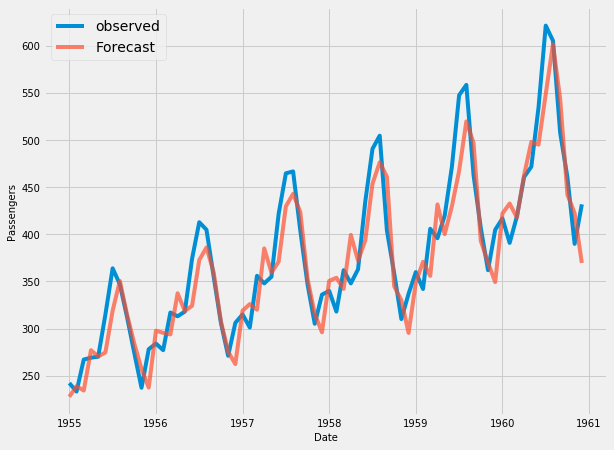

In [11]:
# ------------------------------------------------
# Validating forecasts from the fitted model
# ------------------------------------------------
pred    = results.predict(start=pd.to_datetime('1955-01'), dynamic=False)
actual  = dataset['1955-01':].plot(label='observed')
    
pred.plot(ax=actual, label='Forecast', alpha=.7, figsize=(9, 7))

actual.set_xlabel('Date')
actual.set_ylabel('Passengers')
plt.legend()
plt.show()

In [12]:
# -------------------------------------------------------
# Evaluating the model using different KPIs or metrics
# -------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
y_forecasted    = results.predict(start=pd.to_datetime('1955-01'), dynamic=False)
y_truth         = dataset['1955-01':]

coefficient_of_dermination = r2_score(y_truth, y_forecasted)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(y_truth, y_forecasted)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(y_truth, y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

msle = mean_squared_log_error(y_truth, y_forecasted)
print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.8593682695548996
The Mean Absolute Error of our forecasts is 26.23
The Mean Squared Error of our forecasts is 1036.17
The Mean Squared Log Error of our forecasts is 0.01
The Root Mean Squared Error of our forecasts is 32.19


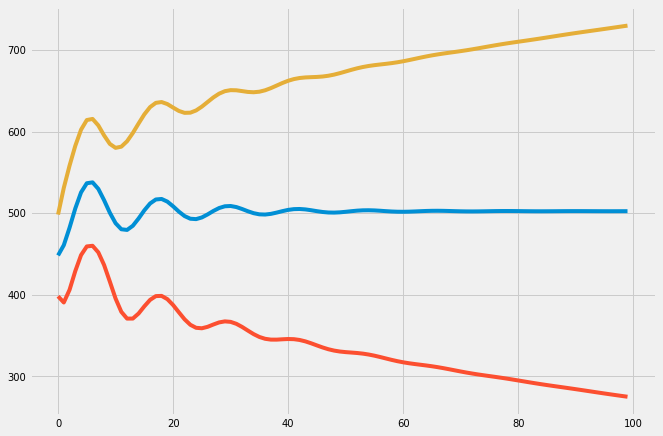


Forecasted Values: 
[448.3611461  460.91772393 482.31887534 505.98171803 525.63123857
 536.84316137 537.91368222 529.92638372 516.10661292 500.72141179
 487.86335083 480.44075461 479.60165888 484.67900614 493.60133141
 503.60313092 512.01559323 516.92736503 517.56590755 514.34047945
 508.58106696 502.07975109 496.5766554  493.32763209 492.85190133
 494.89932329 498.61624454 502.84154662 506.44078559 508.58899271
 508.93760372 507.63884791 505.24046875 502.49466119 500.14090615
 498.72100457 498.46870264 499.291812   500.83899062 502.62302565
 504.16195585 505.10002942 505.28065625 504.75934828 503.76139251
 502.60231911 501.59620692 500.97659594 500.84828761 501.17807612
 501.82155352 502.5744067  503.23198796 503.64101784 503.73141924
 503.52289958 503.1079905  502.61896898 502.18916161 501.91914958
 501.85575081 501.98737906 502.25476515 502.57228339 502.85308398
 503.03117953 503.07531682 502.99222912 502.81986554 502.61364467
 502.43013344 502.31261497 502.28193615 502.33424046 50

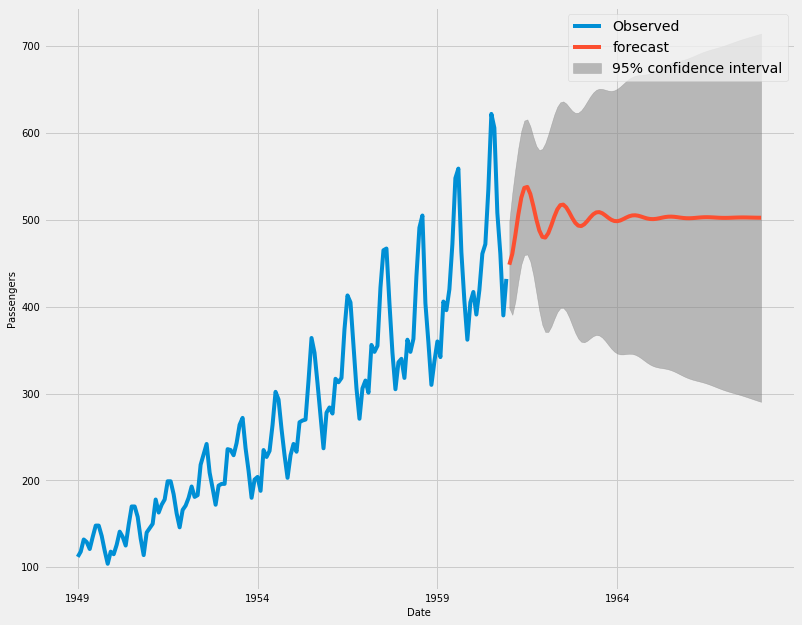

In [15]:
# -----------------------------------------------
# Forecasts (Prediction) and Visualisation
# -----------------------------------------------
pred_uc = results.forecast(steps=100)
plt.plot(pred_uc[0])
plt.plot(pred_uc[2])
plt.show()
    
print()
print("Forecasted Values: ")
print(pred_uc[0])
print()
    
# Visualise forecasts
ax = dataset.plot(label='Observed', figsize=(12, 10))
results.plot_predict('1961', '1968', dynamic=True, ax=ax,  plot_insample=False)    
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()